In [66]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import parse
from scipy.stats import linregress

In [67]:
data = pd.read_csv('../data/todos_FINAL.csv',index_col=0,parse_dates=True)
data

,Ti,To,Ti_CB,Ti_CI,Ti_CC
tiempo,,,,,
2019-09-06 01:00:00,26.650584,23.7,28.151775,26.755003,26.488020
2019-09-06 02:00:00,26.652891,23.9,27.943293,26.843284,26.577193
2019-09-06 03:00:00,26.454455,23.2,27.614803,26.983655,26.690790
2019-09-06 04:00:00,26.014895,22.4,27.165926,25.538033,25.342560
2019-09-06 05:00:00,25.513036,21.9,26.888940,25.670117,25.445677
...,...,...,...,...,...
2019-06-23 19:00:00,27.848124,27.0,29.132126,28.590105,28.200178
2019-06-23 20:00:00,27.375107,25.2,28.734320,28.110628,27.750983
2019-06-23 21:00:00,26.943623,23.8,28.265460,26.665773,26.364116


In [68]:
data.sort_index(inplace=True)

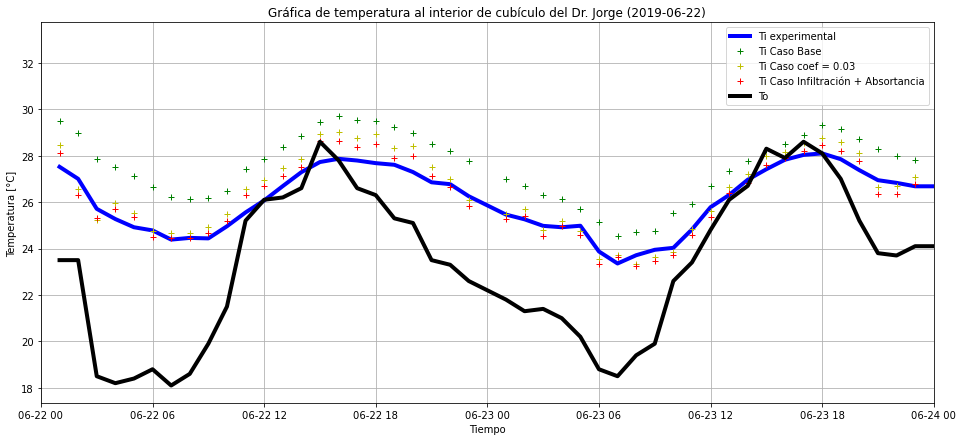

In [69]:
fig, ax = plt.subplots(figsize=(16,7))

fecha1 = parse("2019-06-22")
fecha2 = fecha1 + pd.Timedelta("2D")

ax.set_xlim(fecha1,fecha2)


ax.plot(data.Ti,'b-',linewidth=4,label='Ti experimental')
ax.plot(data.Ti_CB,'g+',label='Ti Caso Base')
ax.plot(data.Ti_CI,'y+',label='Ti Caso coef = 0.03')
ax.plot(data.Ti_CC,'r+',label='Ti Caso Infiltración + Absortancia')

ax.plot(data.To,'k-',linewidth=4,label='To')

#Cositas pa' darle formato
ax.set(xlabel='Tiempo', ylabel='Temperatura [°C]',
       title='Gráfica de temperatura al interior de cubículo del Dr. Jorge (2019-06-22)')
ax.legend()
ax.grid()

1.0810755411340596 1.5648414259420302 0.9815123671822809


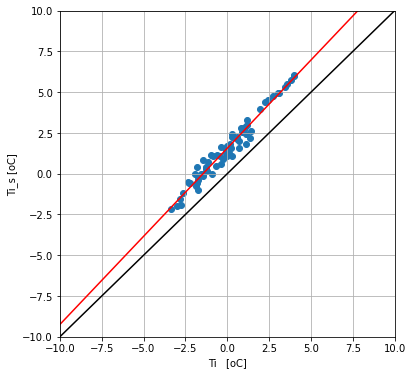

In [70]:
# Para el caso Ti_CB
Ti_s = data.Ti_CB

fig, ax = plt.subplots(figsize=(6,6))


x = np.linspace(-10,10,2)
y = x 

X = np.array( data.Ti-data.Ti.mean()   )
Y = np.array( Ti_s-data.Ti.mean() )
m,b,r_value, p_value,std_err = linregress(X,Y)

ax.scatter(X,Y)
ax.plot(x,y,'k-') 
ax.plot(x,x*m+b,'r-') 


ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.set_ylabel('Ti_s [oC]')
ax.set_xlabel('Ti   [oC]')
ax.grid()
print(m,b,r_value)

1.2268452705189044 0.6006996304347857 0.9719981627013751


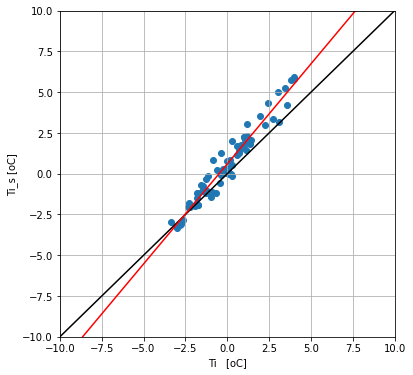

In [71]:
# Para el caso Ti_CI
Ti_s = data.Ti_CI

fig, ax = plt.subplots(figsize=(6,6))


x = np.linspace(-10,10,2)
y = x 

X = data.Ti-data.Ti.mean()  
Y = Ti_s-data.Ti.mean() 
m,b,r_value, p_value,std_err = linregress(X,Y)

ax.scatter(X,Y)
ax.plot(x,y,'k-') 
ax.plot(x,x*m+b,'r-') 


ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.set_ylabel('Ti_s [oC]')
ax.set_xlabel('Ti   [oC]')
ax.grid()
print(m,b,r_value)

1.1831698578246101 0.30380471724637925 0.9731154032422775


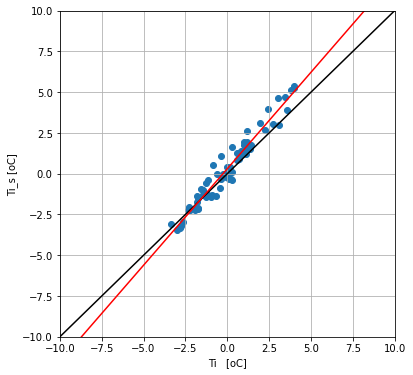

In [72]:
# Para el caso Ti_CC
Ti_s = data.Ti_CC

fig, ax = plt.subplots(figsize=(6,6))


x = np.linspace(-10,10,2)
y = x 

X = data.Ti-data.Ti.mean()  
Y = Ti_s-data.Ti.mean() 
m,b,r_value, p_value,std_err = linregress(X,Y)

ax.scatter(X,Y)
ax.plot(x,y,'k-') 
ax.plot(x,x*m+b,'r-') 


ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.set_ylabel('Ti_s [oC]')
ax.set_xlabel('Ti   [oC]')
ax.grid()
print(m,b,r_value)

# Correlación de Pearson

In [73]:
data[['Ti_CB', 'Ti_CI', 'Ti_CC','Ti']].corr()

,Ti_CB,Ti_CI,Ti_CC,Ti
Ti_CB,1.000000,0.975491,0.977625,0.981512
Ti_CI,0.975491,1.000000,0.999553,0.971998
Ti_CC,0.977625,0.999553,1.000000,0.973115
Ti,0.981512,0.971998,0.973115,1.000000


In [74]:
nombres = ['Ti_CB', 'Ti_CI', 'Ti_CC']
for i in nombres:
    print(i,data.Ti.corr(data[i]))

Ti_CB 0.9815123671822807
Ti_CI 0.9719981627013754
Ti_CC 0.9731154032422774


# dRMSE

In [75]:
(((data.Ti_CB - data.Ti))**2).mean()**.5

1.6176912857306964

In [76]:
for i in nombres:
    print(i,((data[i] - data.Ti)**2).mean()**.5)

Ti_CB 1.6176912857306964
Ti_CI 0.9058336105999596
Ti_CC 0.6793066924772857


# Diferencia promedio de Ti

In [77]:
(data.Ti_CB - data.Ti).mean()

1.5648414259420287

In [78]:
for i in nombres:
    print(i,(data[i]-data.Ti).mean())

Ti_CB 1.5648414259420287
Ti_CI 0.6006996304347824
Ti_CC 0.30380471724637664


# Diferencia promedio de las temperaturas m'aximas diarias

In [79]:
(data.Ti_CB.resample("1D").max() - data.Ti.resample("1D").max()).mean()

1.695178696666667

In [80]:
for i in nombres:
    print(i,(data[i].resample("1D").max() - data.Ti.resample("1D").max()).mean())

Ti_CB 1.695178696666667
Ti_CI 1.2341825400000002
Ti_CC 0.8285183433333335


# Diferencia promedio en el FD

In [81]:
df_s = (data.Ti_CB.resample("1D").max() - data.Ti_CB.resample("1D").min()) / (data.To.resample("1D").max() - data.To.resample("1D").min())
df_e = (data.Ti.resample("1D").max() - data.Ti.resample("1D").min()) / (data.To.resample("1D").max() - data.To.resample("1D").min())

(df_s - df_e).mean()

0.02071887314707978

In [82]:
for i in nombres:
    df_s = (data[i].resample("1D").max() - data[i].resample("1D").min()) / (data.To.resample("1D").max() - data.To.resample("1D").min())
    df_e = (data.Ti.resample("1D").max() - data.Ti.resample("1D").min()) / (data.To.resample("1D").max() - data.To.resample("1D").min())

    print(i,(df_s - df_e).mean())

Ti_CB 0.02071887314707978
Ti_CI 0.09324950739413022
Ti_CC 0.07176969763917239
